### Deep-Learning Lab Session
In this lab we design a neural network that classifies numbers (0 to 9). The  dataset we are going to use is from MNIST. We observe the performnce by changing 
1. activation functions
2. optimization algorithm
3. Number of layers.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.12.0 in c:\users\mudda\onedrive\documents\mrp\lib\site-packages (from tensorflow-intel==2.14.0->tensorflow) (1.16.0)


In [4]:
import numpy as np
import keras
from keras.datasets import mnist
#from keras.utils import np_utils
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
import cv2

## Loading MNIST Data from Keras

MNIST is a database. The acronym stands for “Modified National Institute of Standards and Technology.” The MNIST 

database contains handwritten digits (0 through 9), and can provide a baseline for testing image processing systems. 


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

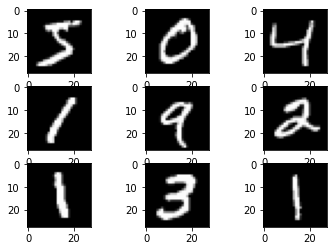

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
x_train_short = x_train[:3000]
x_test_short = x_test[:500]

In [8]:
print(x_train_short.shape)
print(x_test_short.shape)

(3000, 28, 28)
(500, 28, 28)


## Normalizing

In [9]:
x_train = x_train_short.astype('float32')/255.
x_test = x_test_short.astype('float32')/255.

In [10]:
print (x_train.shape)
print (x_test.shape)

(3000, 28, 28)
(500, 28, 28)


In [11]:
print(x_train.shape[0])

3000


In [12]:
print((x_train.shape[1:]))

(28, 28)


In [13]:
print(np.prod(x_train.shape[1:]))

784


In [14]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(3000, 784)
(500, 784)


In [15]:
y_train = y_train[:3000]
y_test = y_test[:500]

In [16]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 9 1 5]
(3000,)


## One hot encoding the Target variable

In [17]:
from keras.utils import to_categorical

n_classes = 10  # Replace with the actual number of classes

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


In [18]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3000, 10)


# Neural Network Architecture

## 1. Basic Network with 1 Hidden Layer

In [19]:
model1 = Sequential()

In [21]:
from tensorflow.keras.layers import Dense, Dropout, Activation

In [22]:
model1.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model1.add(Dense(n_classes, activation = 'softmax'))

In [23]:
model1.compile(optimizer="sgd",
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

In [24]:
model1.summary()
#keras.utils.plot_model(model1, "my_first_model.png", show_shapes = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
784*512 + 512

401920

In [26]:
history = model1.fit(x_train, y_train,
                     batch_size=128, epochs=100, verbose=True, 
                     validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/100
24/24 [==============================] - 2s 33ms/step - loss: 2.3328 - accuracy: 0.1010 - val_loss: 2.2853 - val_accuracy: 0.1580
Epoch 2/100
24/24 [==============================] - 0s 12ms/step - loss: 2.2576 - accuracy: 0.2030 - val_loss: 2.2484 - val_accuracy: 0.2480
Epoch 3/100
24/24 [==============================] - 0s 12ms/step - loss: 2.2156 - accuracy: 0.2980 - val_loss: 2.2130 - val_accuracy: 0.2660
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 2.1748 - accuracy: 0.3760 - val_loss: 2.1794 - val_accuracy: 0.3020
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 2.1350 - accuracy: 0.4213 - val_loss: 2.1345 - val_accuracy: 0.3840
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 2.0953 - accuracy: 0.4733 - val_loss: 2.1023 - val_accuracy: 0.4460
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 2.0567 - accuracy: 0.5160 - val_loss: 2.0647 - val_accuracy: 0.4660
Epoch 

In [27]:
def plot_history(history):
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

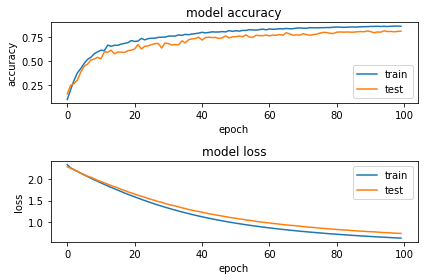

In [28]:
plot_history(history)

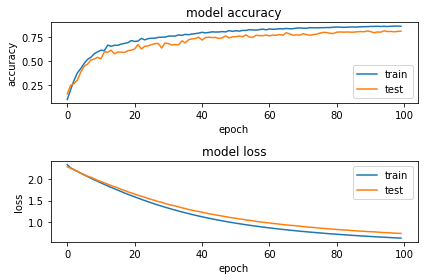

In [29]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [30]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 0.6241 - accuracy: 0.8627 - 456ms/epoch - 5ms/step
Train Loss 0.6240823864936829
Train Accuracy 0.862666666507721


In [31]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 0.7364 - accuracy: 0.8080 - 113ms/epoch - 7ms/step
Test Loss 0.7363970875740051
Test Accuracy 0.8080000281333923


## 2. Network with 2 Hidden Layers

In [32]:
model2= Sequential()

In [33]:
model2.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model2.add(Dense(100, activation = 'sigmoid'))
model2.add(Dense(n_classes, activation = 'softmax'))
model2.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()
#keras.utils.plot_model(model2, "my_first_model.png", show_shapes = True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 454230 (1.73 MB)
Trainable params: 454230 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Epoch 1/100
24/24 [==============================] - 2s 31ms/step - loss: 2.3667 - accuracy: 0.1020 - val_loss: 2.3123 - val_accuracy: 0.0860
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 2.3016 - accuracy: 0.0960 - val_loss: 2.2902 - val_accuracy: 0.0960
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 2.2892 - accuracy: 0.1190 - val_loss: 2.2831 - val_accuracy: 0.1360
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 2.2839 - accuracy: 0.1300 - val_loss: 2.2807 - val_accuracy: 0.2020
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 2.2800 - accuracy: 0.1850 - val_loss: 2.2764 - val_accuracy: 0.2080
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 2.2756 - accuracy: 0.2090 - val_loss: 2.2727 - val_accuracy: 0.1840
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 2.2718 - accuracy: 0.1963 - val_loss: 2.2693 - val_accuracy: 0.2600
Epoch 

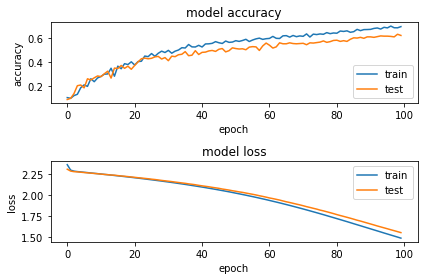

In [35]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [36]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 1.4805 - accuracy: 0.7000 - 479ms/epoch - 5ms/step
Train Loss 1.4805247783660889
Train Accuracy 0.699999988079071


In [37]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 1.5536 - accuracy: 0.6240 - 134ms/epoch - 8ms/step
Test Loss 1.5535968542099
Test Accuracy 0.6240000128746033


## 3. Network with 3 Hidden Layers

In [38]:
model3= Sequential()

In [39]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 100)               51300     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 464330 (1.77 MB)
Trainable params: 464330 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Epoch 1/100
24/24 [==============================] - 2s 29ms/step - loss: 2.4939 - accuracy: 0.0950 - val_loss: 2.4288 - val_accuracy: 0.0840
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 2.3529 - accuracy: 0.0950 - val_loss: 2.3417 - val_accuracy: 0.0640
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 2.3129 - accuracy: 0.0977 - val_loss: 2.3123 - val_accuracy: 0.0980
Epoch 4/100
24/24 [==============================] - 0s 15ms/step - loss: 2.3023 - accuracy: 0.1093 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 2.2998 - accuracy: 0.1093 - val_loss: 2.2991 - val_accuracy: 0.1740
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 2.2988 - accuracy: 0.1287 - val_loss: 2.2973 - val_accuracy: 0.1340
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 2.2984 - accuracy: 0.1357 - val_loss: 2.2964 - val_accuracy: 0.1340
Epoch 

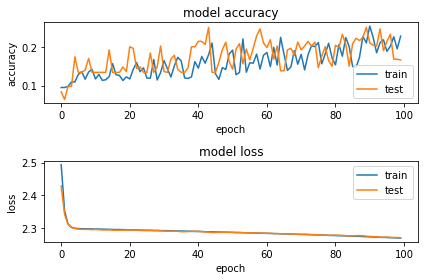

In [41]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [42]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 2.2686 - accuracy: 0.1587 - 497ms/epoch - 5ms/step
Train Loss 2.2685964107513428
Train Accuracy 0.1586666703224182


In [43]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 2.2708 - accuracy: 0.1660 - 119ms/epoch - 7ms/step
Test Loss 2.2707791328430176
Test Accuracy 0.16599999368190765


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [44]:
model4= Sequential()

In [45]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 100)               51300     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454230 (1.73 MB)
Trainable params: 454230 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Epoch 1/100
24/24 [==============================] - 2s 30ms/step - loss: 2.3081 - accuracy: 0.1333 - val_loss: 2.2597 - val_accuracy: 0.2140
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 2.2444 - accuracy: 0.2743 - val_loss: 2.2251 - val_accuracy: 0.3240
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 2.2087 - accuracy: 0.3600 - val_loss: 2.1934 - val_accuracy: 0.4140
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 2.1753 - accuracy: 0.4540 - val_loss: 2.1617 - val_accuracy: 0.3940
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 2.1416 - accuracy: 0.4510 - val_loss: 2.1331 - val_accuracy: 0.4280
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 2.1093 - accuracy: 0.4800 - val_loss: 2.1010 - val_accuracy: 0.4740
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 2.0753 - accuracy: 0.5187 - val_loss: 2.0722 - val_accuracy: 0.5000
Epoch 

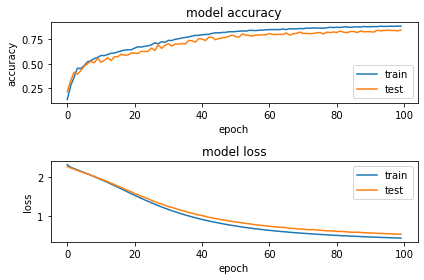

In [47]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [48]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 1s - loss: 0.4414 - accuracy: 0.8877 - 508ms/epoch - 5ms/step
Train Loss 0.441430002450943
Train Accuracy 0.887666642665863


In [49]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 0.5448 - accuracy: 0.8460 - 118ms/epoch - 7ms/step
Test Loss 0.5447758436203003
Test Accuracy 0.8460000157356262


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [50]:
model5= Sequential()

In [51]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 100)               51300     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454230 (1.73 MB)
Trainable params: 454230 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
24/24 [==============================] - 2s 33ms/step - loss: 1.6669 - accuracy: 0.5350 - val_loss: 1.1549 - val_accuracy: 0.6980
Epoch 2/10
24/24 [==============================] - 0s 18ms/step - loss: 0.7917 - accuracy: 0.8183 - val_loss: 0.7020 - val_accuracy: 0.8080
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.5245 - accuracy: 0.8660 - val_loss: 0.5457 - val_accuracy: 0.8520
Epoch 4/10
24/24 [==============================] - 0s 17ms/step - loss: 0.4139 - accuracy: 0.8870 - val_loss: 0.4550 - val_accuracy: 0.8740
Epoch 5/10
24/24 [==============================] - 0s 17ms/step - loss: 0.3514 - accuracy: 0.9067 - val_loss: 0.4151 - val_accuracy: 0.8800
Epoch 6/10
24/24 [==============================] - 0s 18ms/step - loss: 0.3175 - accuracy: 0.9080 - val_loss: 0.3672 - val_accuracy: 0.8980
Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 0.2811 - accuracy: 0.9223 - val_loss: 0.3682 - val_accuracy: 0.8960
Epoch 8/10
24

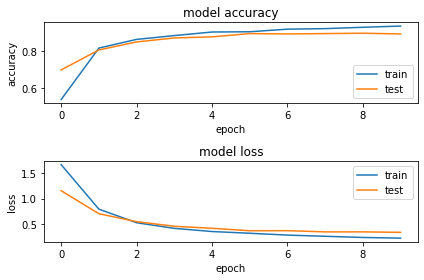

In [53]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [54]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 0.2050 - accuracy: 0.9437 - 484ms/epoch - 5ms/step
Train Loss 0.20501694083213806
Train Accuracy 0.9436666369438171


In [55]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 0.3353 - accuracy: 0.8960 - 120ms/epoch - 7ms/step
Test Loss 0.33531454205513
Test Accuracy 0.8960000276565552


## 6. Network with BatchNormalization

In [56]:
model6= Sequential()

In [57]:
model6.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model6.add(BatchNormalization())
model6.add(Dense(100, activation = 'relu'))
model6.add(BatchNormalization())
model6.add(Dense(n_classes, activation = 'softmax'))
model6.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_16 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 456678 (1.74 MB)
Trainable params: 45545

In [58]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Epoch 1/100
24/24 [==============================] - 4s 38ms/step - loss: 0.6773 - accuracy: 0.7947 - val_loss: 1.8431 - val_accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 20ms/step - loss: 0.2292 - accuracy: 0.9413 - val_loss: 1.7790 - val_accuracy: 0.4080
Epoch 3/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1592 - accuracy: 0.9640 - val_loss: 1.7562 - val_accuracy: 0.4220
Epoch 4/100
24/24 [==============================] - 0s 20ms/step - loss: 0.1150 - accuracy: 0.9817 - val_loss: 1.7344 - val_accuracy: 0.4740
Epoch 5/100
24/24 [==============================] - 0s 21ms/step - loss: 0.0796 - accuracy: 0.9903 - val_loss: 1.7033 - val_accuracy: 0.5180
Epoch 6/100
24/24 [==============================] - 1s 21ms/step - loss: 0.0623 - accuracy: 0.9933 - val_loss: 1.6319 - val_accuracy: 0.5820
Epoch 7/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0468 - accuracy: 0.9967 - val_loss: 1.5506 - val_accuracy: 0.6040
Epoch 

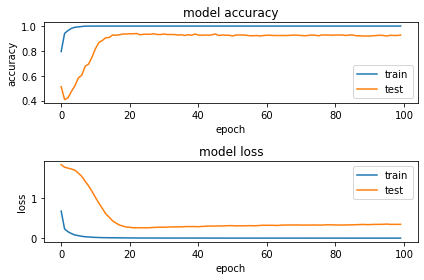

In [59]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [60]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 1s - loss: 1.1085e-04 - accuracy: 1.0000 - 504ms/epoch - 5ms/step
Train Loss 0.00011085023288615048
Train Accuracy 1.0


In [61]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 0.3469 - accuracy: 0.9280 - 134ms/epoch - 8ms/step
Test Loss 0.34686487913131714
Test Accuracy 0.9279999732971191


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [62]:
model7= Sequential()

In [63]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_3 (Bat  (None, 100)               400       
 chNormalization)                                     

In [64]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

Epoch 1/100
24/24 [==============================] - 4s 49ms/step - loss: 2.9235 - accuracy: 0.5940 - val_loss: 3.3966 - val_accuracy: 0.4840
Epoch 2/100
24/24 [==============================] - 1s 27ms/step - loss: 1.9231 - accuracy: 0.7913 - val_loss: 3.0809 - val_accuracy: 0.4900
Epoch 3/100
24/24 [==============================] - 1s 26ms/step - loss: 1.6403 - accuracy: 0.8343 - val_loss: 2.8934 - val_accuracy: 0.4900
Epoch 4/100
24/24 [==============================] - 1s 26ms/step - loss: 1.4780 - accuracy: 0.8580 - val_loss: 2.7304 - val_accuracy: 0.4400
Epoch 5/100
24/24 [==============================] - 1s 27ms/step - loss: 1.3336 - accuracy: 0.8767 - val_loss: 2.5938 - val_accuracy: 0.4200
Epoch 6/100
24/24 [==============================] - 1s 26ms/step - loss: 1.2253 - accuracy: 0.8820 - val_loss: 2.4389 - val_accuracy: 0.4600
Epoch 7/100
24/24 [==============================] - 1s 27ms/step - loss: 1.1312 - accuracy: 0.8887 - val_loss: 2.3058 - val_accuracy: 0.4900
Epoch 

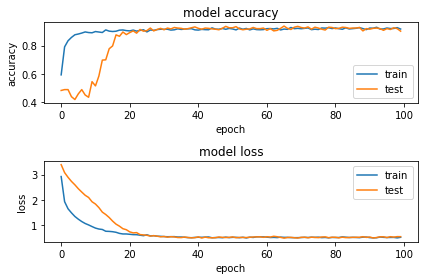

In [65]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [66]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

94/94 - 1s - loss: 0.3535 - accuracy: 0.9687 - 507ms/epoch - 5ms/step
Train Loss 0.3534620404243469
Train Accuracy 0.968666672706604


In [67]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

16/16 - 0s - loss: 0.5291 - accuracy: 0.9020 - 139ms/epoch - 9ms/step
Test Loss 0.5290869474411011
Test Accuracy 0.9020000100135803
